In [797]:
import itertools
import numpy as np
import matplotlib.pyplot as mpl
import random
import math
import pandas as pd

# Regresion Logistica

In [798]:
eps = np.finfo(float).eps
eps=2.718281828459045235360287471352662497757247093699959574

def sigmo(z):
    #print("sigmo: ", z[0])
    return (1/(1+eps**(-z[0])))

# Prediccion

In [799]:
def calc(x, theta):
    suma = 0
    #print("x: ", x)
    for j in range(x.shape[0]):
        suma+=x[j]*theta[j]
    return suma

def predict(x, theta):
    y2 = []
    for i in range(x.shape[0]):
        #print(theta)
        y2.append(sigmo(calc(x[i,:], theta)))
    return y2

# Gradiente

In [822]:
def gradiente(X,Y,theta,alpha, num_iter):
    for i in range(num_iter):
        first=np.array(predict(X, theta))
        h_theta = (first.reshape(first.shape[0],1) - Y)
        tmp = h_theta * X
        gamma =  np.sum(tmp, axis=0).reshape(theta.shape[0],1)
        theta = theta - ((alpha/X.shape[0]) * gamma)
    
    return theta

# Funcion Costo

In [801]:
def logistic_cost(y2, y):
    cost = 0
    for i in range (len(y)):
        ycal=y2[i]
        #print("ycal=", ycal, " y=", y[i][0])
        cost+=(y[i][0]*np.log(ycal))+((1-y[i][0])*np.log(1-ycal))
    
    return cost/(-len(y))


# Cargar los datos

In [802]:
def get_y(y):
    y=np.array(y)
    y=y.reshape(len(y),1)
    return y

In [803]:
y=[0,0,2,0,1,0,2,2,1,0,2,0,1,2,2,2,1,1]
size=18
variables=7

#gana
y_gana=  [0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0]
y_empata=[0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1]
y_pierde=[1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0]

y_gana = get_y(y_gana)
y_empata = get_y(y_empata)
y_pierde = get_y(y_pierde)

#---------- Obtengo la data
data = np.loadtxt('puntos.txt',delimiter=",")
X = data[:,:7]
print(X)
print(X.shape)

[[ 0.0000e+00  2.7100e+01  2.6500e+01  2.0000e+01  5.3000e+01  4.6788e+04
  -1.0000e+00]
 [ 1.0000e+00  2.7100e+01  2.8000e+01  2.2000e+01  3.0000e+00  5.0000e+04
   1.0000e+00]
 [ 2.0000e+00  2.7600e+01  2.8000e+01  2.3000e+01  3.0000e+00  5.0000e+04
   1.0000e+00]
 [ 3.0000e+00  2.7200e+01  2.6400e+01  2.8000e+01  8.0000e+00  6.0000e+04
  -1.0000e+00]
 [ 4.0000e+00  2.8000e+01  2.4600e+01  3.0000e+01  3.0000e+00  5.0000e+04
   1.0000e+00]
 [ 5.0000e+00  2.6400e+01  2.8400e+01  2.5000e+01  4.3000e+01  6.0235e+04
  -1.0000e+00]
 [ 6.0000e+00  2.6100e+01  2.6900e+01  1.8000e+01  3.6400e+03  4.5000e+04
  -1.0000e+00]
 [ 7.0000e+00  2.5700e+01  2.7900e+01  2.1000e+01  3.0000e+00  5.0000e+04
   1.0000e+00]
 [ 8.0000e+00  2.5900e+01  2.8100e+01  2.0000e+01  3.0000e+00  5.0000e+04
   1.0000e+00]
 [ 9.0000e+00  2.6600e+01  2.9600e+01  1.6000e+01  5.7000e+02  4.8665e+04
  -1.0000e+00]
 [ 1.0000e+01  2.6000e+01  2.6400e+01  2.7000e+01  4.3000e+01  4.2354e+04
  -1.0000e+00]
 [ 1.1000e+01  2.6700

# Normalizar los datos

In [804]:
#entre 0-1
def normalized(array, size):
    new_array=np.zeros(size)
    _min=np.min(array)
    _max=np.max(array)
    minmax=_max-_min
    for i in range (0,len(array)):
        new_array[i]=(array[i]-_min)/minmax
    
    return new_array            

for i in range (2,variables):
    X[:,i]= normalized(X[:,i], size)
print(X.shape)

(18, 7)


# Calcular theta

In [842]:
theta_gana = np.zeros((variables,1))
theta_empata = np.zeros((variables,1))
theta_pierde = np.zeros((variables,1))

In [843]:
#Calcular theta si gana
theta_gana = gradiente(X,y_gana,theta_gana,0.001,100000)
print(theta_gana)

#Calcular theta si empata
theta_empata = gradiente(X,y_empata,theta_empata,0.001,100000)
print(theta_empata)

#Calcular theta si pierde
theta_pierde = gradiente(X,y_pierde,theta_pierde,0.001,100000)
print(theta_pierde)


[[ 0.08981704]
 [-0.11964142]
 [ 0.91197502]
 [ 0.48391957]
 [ 3.29578857]
 [-0.14098417]
 [ 1.77970086]]
[[ 0.20191381]
 [-0.0624879 ]
 [-2.19920079]
 [ 0.70109793]
 [-1.85362929]
 [-0.7960204 ]
 [-0.07946297]]
[[-0.29226921]
 [ 0.07974322]
 [ 0.95745506]
 [-1.02113844]
 [-1.80184929]
 [ 0.87163605]
 [-1.67559303]]


# Predecir resultados

In [886]:
def predict_mult(X, theta_gana, theta_pierde, theta_empata):
    y_pred_gana=predict(X,theta_gana)
    y_pred_empata=predict(X,theta_empata)
    y_pred_pierde=predict(X,theta_pierde)
    res=[]
    print(y_pred_gana)
    print(y_pred_empata)
    print(y_pred_pierde)
    for i in range(len(y_pred_gana)):
#         print(y_pred_gana[i],"", y_pred_empata[i],"", y_pred_pierde[i])
        if (y_pred_gana[i]>y_pred_empata[i] and y_pred_gana[i]>y_pred_pierde[i]):
            res.append(2)
        elif (y_pred_empata[i]>y_pred_gana[i] and y_pred_empata[i]>y_pred_pierde[i]):
            res.append(1)
        elif (y_pred_pierde[i]>y_pred_empata[i] and y_pred_pierde[i]>y_pred_gana[i]):
            res.append(0)
    return res


In [882]:
y_values_calc=predict_mult(X, theta_gana, theta_pierde, theta_empata)
print(y)
print(y_values_calc)

[0.060240828477579236, 0.3565084173392839, 0.37145285564463554, 0.08994740544164188, 0.31596129096223513, 0.14844270516220617, 0.7633727123676611, 0.5157557640593378, 0.5326649095430889, 0.27102914509115617, 0.18411032110826792, 0.5063125456438973, 0.1502717450410026, 0.7287905939290907, 0.5677780911705358, 0.81690255439694, 0.3336725886775966, 0.26483592841432557]
[0.07225580438663126, 0.046447909699682724, 0.05726399046299575, 0.15153191022216342, 0.3597898550432472, 0.08941573403881055, 0.03387157770578718, 0.15071667596190302, 0.15741070280153244, 0.07142018961885185, 0.5036357506218124, 0.48800964723545454, 0.7038079076561236, 0.3804828348079535, 0.36504838486203334, 0.21449375782434138, 0.5339673756465286, 0.6273487547987536]
[0.9187466023285181, 0.6652618256880091, 0.5894025172233236, 0.7748493311252671, 0.20541562189934578, 0.7643434734134247, 0.2694006713152457, 0.2451526649058119, 0.21590049703186104, 0.603788309511253, 0.232031063640272, 0.061590553605785074, 0.1463554622167

## Costo 

In [883]:
y_pred_gana=predict(X,theta_gana)
y_pred_empata=predict(X,theta_empata)
y_pred_pierde=predict(X,theta_pierde)
print("Costo Gana")
print(logistic_cost(y_pred_gana, y_gana))
print("Costo Empata")
print(logistic_cost(y_pred_empata, y_empata))
print("Costo Pierde")
print(logistic_cost(y_pred_pierde, y_pierde))

Costo Gana
0.47200725703954155
Costo Empata
0.42065772565688475
Costo Pierde
0.39012642269380593


# Matriz de Confusion

In [852]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=mpl.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    mpl.imshow(cm, interpolation='nearest', cmap=cmap)
    mpl.title(title)
    mpl.colorbar()
    tick_marks = np.arange(len(classes))
    mpl.xticks(tick_marks, classes, rotation=45)
    mpl.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        mpl.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    mpl.tight_layout()
    mpl.ylabel('Valores Calculados')
    mpl.xlabel('Valores Reales')

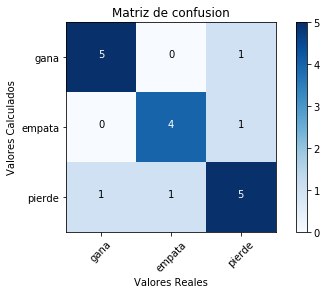

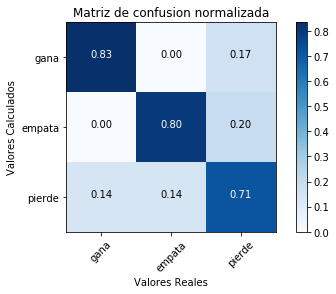

In [853]:
def conf_matr(values, y, y2):
    mat = np.zeros((3,3), dtype=int)
    for i in range(len(y)):
        mat[y[i]][y2[i]]+=1    
    names=['gana', 'empata', 'pierde']
    mpl.figure()
    plot_confusion_matrix(mat, classes=names,
                          title='Matriz de confusion')
    mpl.figure()
    plot_confusion_matrix(mat, classes=names, normalize=True,
                          title='Matriz de confusion normalizada')
    
conf_matr([0,1,2], y, y_values_calc)

### Cross Validation

In [865]:
def partir(x,porcent):
    tam = x.shape[0]
    tam_test = round(tam*porcent/100)
    tam_train = tam-tam_test
    arreglo = np.arange(0,tam)
    rand = random.shuffle(arreglo)
    train = arreglo[:tam_train]
    test =arreglo[tam_train:]
    
    return train,test

def construir(indices,X,y_gana, y_empata, y_pierde):
    matrizx = np.zeros((len(indices),X.shape[1]))
    matrizy_gana = np.zeros((len(indices),Y.shape[1]))    
    matrizy_empata = np.zeros((len(indices),Y.shape[1]))    
    matrizy_pierde = np.zeros((len(indices),Y.shape[1]))    

    for i in range(0,len(indices)):
        matrizx[i,:]=X[indices[i]]
        matrizy_gana[i,:]=y_gana[indices[i]]
        matrizy_empata[i,:]=y_empata[indices[i]]
        matrizy_pierde[i,:]=y_pierde[indices[i]]

    return matrizx,matrizy_gana, matrizy_empata, matrizy_pierde

def train(X, y_gana, y_empata, y_pierde):
    indices = partir(X,15) #parte en 15% -> 3 datos
    n_X, n_y_gana, n_y_empata, n_y_pierde = construir(indices[0], X, y_gana, y_empata, y_pierde)
    
    theta_gana = np.zeros((7,1))
    theta_empata = np.zeros((7,1))
    theta_pierde = np.zeros((7,1))
    #theta si gana
    theta_gana = gradiente(n_X, n_y_gana,theta_gana,0.001,100000)
    #theta si empata
    theta_empata = gradiente(n_X, n_y_empata,theta_empata,0.001,100000)
    #theta si pierde
    theta_pierde = gradiente(n_X, n_y_pierde,theta_pierde,0.001,100000)
    
    return theta_gana, theta_empata, theta_pierde

In [878]:
theta_gana_cross = np.zeros((7,1))
theta_empata_cross = np.zeros((7,1))
theta_pierde_cross = np.zeros((7,1))

for i in range (5):
    print("Iteracion: ", i+1)
    theta_gana_cross_new, theta_empata_cross_new, theta_pierde_cross_new = train(X, y_gana, y_empata, y_pierde)
    theta_gana_cross= np.mean( np.array([ theta_gana_cross, theta_gana_cross_new ]), axis=0)
    theta_empata_cross= np.mean( np.array([ theta_empata_cross, theta_empata_cross_new ]), axis=0)
    theta_pierde_cross= np.mean( np.array([ theta_pierde_cross, theta_pierde_cross_new ]), axis=0)
    print(theta_gana_cross)
    print(theta_empata_cross)
    print(theta_pierde_cross)

Iteracion:  1
[[ 0.07692679]
 [-0.063324  ]
 [ 0.24382805]
 [ 0.17131825]
 [ 1.7452399 ]
 [ 0.04730661]
 [ 0.61079815]]
[[ 0.08081423]
 [-0.03063161]
 [-0.5725563 ]
 [ 0.13619361]
 [-0.9764305 ]
 [-0.55157516]
 [ 0.09332647]]
[[-0.1785554 ]
 [ 0.04119618]
 [ 0.21061119]
 [-0.16290813]
 [-0.94753526]
 [ 0.49818103]
 [-0.44953008]]
Iteracion:  2
[[ 0.17585303]
 [-0.14296571]
 [ 0.26438995]
 [ 0.92106031]
 [ 1.96576916]
 [ 0.14986762]
 [ 0.97785111]]
[[ 0.13121111]
 [-0.03743716]
 [-1.38028388]
 [ 0.2705481 ]
 [-1.39984227]
 [-0.80525699]
 [ 0.09619264]]
[[-0.30533722]
 [ 0.09571432]
 [ 0.79547085]
 [-1.11464569]
 [-0.54824815]
 [ 0.50445264]
 [-0.74117768]]
Iteracion:  3
[[ 0.13195313]
 [-0.14087689]
 [ 0.74828286]
 [ 0.9987674 ]
 [ 2.11256601]
 [ 0.01937404]
 [ 1.36775924]]
[[ 0.15680579]
 [-0.04083264]
 [-1.79017511]
 [ 0.33137651]
 [-1.61116368]
 [-0.92842794]
 [ 0.09290707]]
[[-0.29355846]
 [ 0.0969964 ]
 [ 0.69233505]
 [-1.34538479]
 [-0.41197935]
 [ 0.72432068]
 [-1.34874033]]
Iter

## Costo cross-validation

In [884]:
y_pred_gana=predict(X,theta_gana_cross)
y_pred_empata=predict(X,theta_empata_cross)
y_pred_pierde=predict(X,theta_pierde_cross)
print("Costo Gana")
print(logistic_cost(y_pred_gana, y_gana))
print("Costo Empata")
print(logistic_cost(y_pred_empata, y_empata))
print("Costo Pierde")
print(logistic_cost(y_pred_pierde, y_pierde))

Costo Gana
0.5130874246274184
Costo Empata
0.4504006207105513
Costo Pierde
0.3965634241687844


## Matriz de confusion cross-validation

In [887]:
y_values_calc_cross=predict_mult(X, theta_gana_cross, theta_pierde_cross, theta_empata_cross)
print(y)
print(y_values_calc_cross)

[0.08734511970068694, 0.2528234483162915, 0.26883328355172414, 0.12101019073015389, 0.29717625846943324, 0.15361952587168307, 0.7494162445710274, 0.34519734518730594, 0.3457791094272122, 0.22899641095218784, 0.26079139587744465, 0.35887593941494633, 0.18442498029352794, 0.5876016497616039, 0.23037047396158114, 0.8157292874260632, 0.32920344136337704, 0.22818135047668245]
[0.05472630594220628, 0.08208347442842581, 0.09824746935503548, 0.12331142114975122, 0.3917215833968327, 0.09195371725268306, 0.02932931820570793, 0.25434127021703773, 0.2705074071272176, 0.08105891032655328, 0.3986988319573947, 0.5918029807920735, 0.6045376589034254, 0.5340209503392118, 0.6081032891672974, 0.17815946778580638, 0.5106972642852691, 0.6036021426621364]
[0.9119877806798968, 0.6938186122590579, 0.624725607153866, 0.7699799473665034, 0.24140870173354348, 0.7697645100910748, 0.32028532834192297, 0.31686928731576425, 0.2912123561814855, 0.6543198517066153, 0.2528131505130054, 0.0992331594143911, 0.19250543821

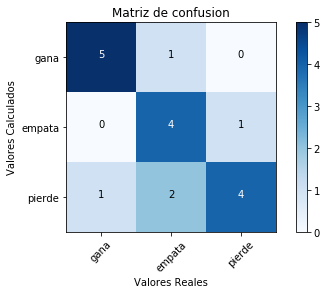

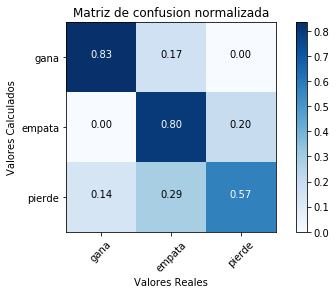

In [880]:
conf_matr([0,1,2], y, y_values_calc_cross)